# Compensation Analysis of the IBM Employee Data-set

dataset info:

Title: IBM HR Analytics Employee Attrition & Performance Dataset

Dataset Source: Kaggle

Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Date Accessed: September 26, 2023

In [4]:
# loading python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# creating a dataframe for the dataset
df = pd.read_csv('IBM.csv')

In [6]:
# checking the features
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vpop\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


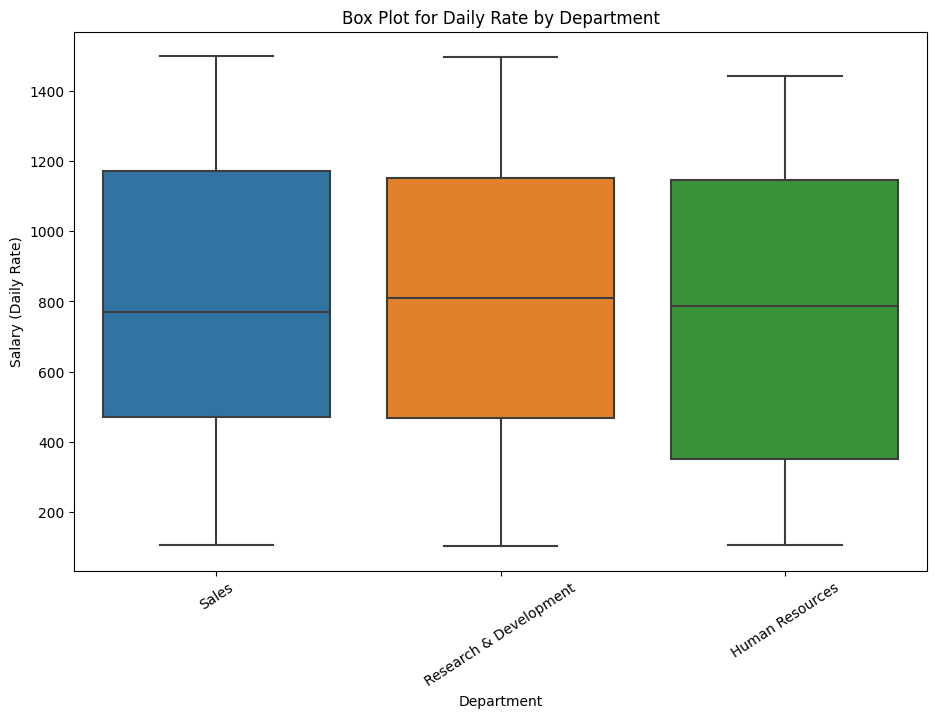

In [9]:
# visualizing the yearly income by department using a box plot
plt.figure(figsize=(11, 7))
sns.boxplot(x='Department', y='DailyRate', data=df)

# adding graph information
plt.xlabel('Department')
plt.ylabel('Salary (Daily Rate)')
plt.title('Box Plot for Daily Rate by Department')
plt.xticks(rotation=33)
plt.show()